<a href="https://colab.research.google.com/github/SahithiDuppati/Machine_Learning_With_Python/blob/main/Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning with Python

### Tensors

Types of Tensors - Tensor Declaration

In [ ]:
import tensorflow as tf
a = tf.Variable("string", tf.string)
print(a)

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'string'>


Reshaping tensors

In [ ]:
tensor = tf.ones([2,2,2])
print(tensor)
tensor = tf.reshape(tensor,[8])
print(tensor)

tf.Tensor(
[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]], shape=(2, 2, 2), dtype=float32)
tf.Tensor([1. 1. 1. 1. 1. 1. 1. 1.], shape=(8,), dtype=float32)


TensorFlow Algorithms

*   Linear Regression
*   Classification
*   Clustering
*   Hidden Markov Models



### Linear Regression
(Line of best fit)


In [ ]:
#SetUp and Imports
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np #matrix operations
import pandas as pd #data set import and visualizations
import matplotlib.pyplot as plt #graphs
from IPython.display import clear_output #specific for ouptput in notebook
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

California Housing Dataset

In [ ]:
dtrain = pd.read_csv('/content/sample_data/california_housing_train.csv')
dtest = pd.read_csv('/content/sample_data/california_housing_train.csv')
print(dtrain.head())
y_train = dtrain.pop('housing_median_age')
y_test = dtest.pop('housing_median_age')
print(dtrain.head())
print(y_train)
print(dtrain.loc[0], y_train.loc[0])
print(dtrain["population"])

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
   longitude  latitude  total_rooms  total_bedrooms  population  households  \
0    -114.31     34.19       5612.0          1283.0      1015.0       472.0   
1    -114.47 

In [ ]:
dtrain = pd.read_csv('/content/sample_data/california_housing_train.csv')
dtrain.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
dtrain.shape

(17000, 9)

<Axes: >

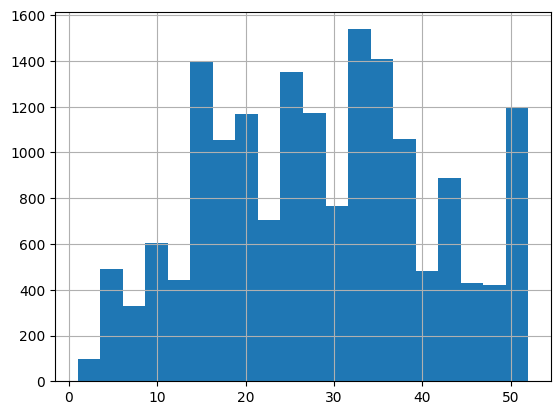

In [ ]:
dtrain.housing_median_age.hist(bins=20)

<Axes: >

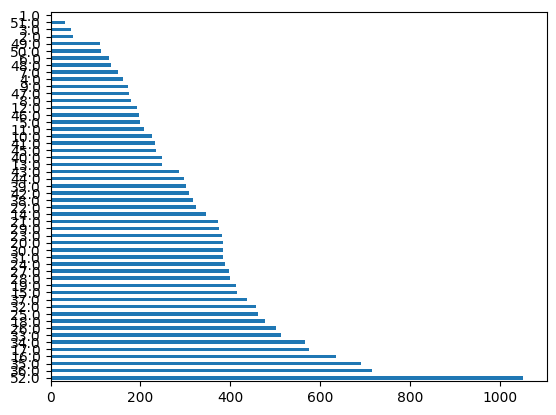

In [ ]:
dtrain.housing_median_age.value_counts().plot(kind='barh')

Types of Information in dataset
*   Categorical
*   Numeric



In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic.csv')
dataframe.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [ ]:
val_dataframe = dataframe.sample(frac=0.2, random_state=1337)
train_dataframe = dataframe.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 713 samples for training and 178 for validation


Handling Null Data

In [ ]:
# print(dataframe[dataframe.isnull().any(axis=1)])/
dataframe.isnull().sum()

index       0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
dtype: int64

In [ ]:
dataframe['age'].ffill()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [ ]:

#dataframe.dropna(how="any",inplace=True)
# dataframe.pop("embarked")
# dataframe['age'].ffill()
# dataframe['age].bfill()
# dataframe['age'].fillna(dataframe['age'].median(), inplace = True)
# dataframe.groupby(['pclass', 'alive'])['age'].mean()
dataframe['embarked'] = dataframe['embarked'].astype('category')
dataframe['embarked'] = dataframe['embarked'].cat.codes
dataframe['embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: embarked, Length: 891, dtype: int8

In [ ]:
dataframe['sex'] = dataframe['sex'].astype('category')
dataframe['sex'] = dataframe['sex'].cat.codes
dataframe['sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex, Length: 891, dtype: int8

In [ ]:
dataframe['who'] = dataframe['who'].astype('category')
dataframe['who'] = dataframe['who'].cat.codes
dataframe['who']

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Name: who, Length: 891, dtype: int8

In [ ]:
dataframe['class'] = dataframe['class'].astype('category')
dataframe['class'] = dataframe['class'].cat.codes
dataframe['class']

0      2
1      0
2      2
3      0
4      2
      ..
886    1
887    0
888    2
889    0
890    2
Name: class, Length: 891, dtype: int8

In [ ]:
dataframe['alone'] = dataframe['alone'].astype('category')
dataframe['alone'] = dataframe['alone'].cat.codes
dataframe['alone']

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: alone, Length: 891, dtype: int8

In [ ]:
dataframe['age'] = dataframe['age'].ffill()

In [ ]:
dataframe.age = dataframe.age.astype(int)
dataframe.fare = dataframe.fare.astype(int)
print(dataframe['survived'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


In [ ]:
dataframe = dataframe.reset_index()

In [ ]:
dataframe.columns

Index(['index', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'alone', 'survived'],
      dtype='object')

In [ ]:
dataframe.get('survived')

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [ ]:
dataframe.head()

,index,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,0,1,22,1,0,7,2,2,1,0
1,1,0,38,1,0,71,0,0,2,0
2,2,0,26,0,0,7,2,2,2,1
3,3,0,35,1,0,53,2,0,2,0
4,4,1,35,0,0,8,2,2,1,1


In [ ]:
labels = dataframe.pop('survived')

In [ ]:
tf.convert_to_tensor(dataframe,dtype = tf.int32)

<tf.Tensor: shape=(891, 10), dtype=int32, numpy=
array([[  0,   1,  22, ...,   2,   1,   0],
       [  1,   0,  38, ...,   0,   2,   0],
       [  2,   0,  26, ...,   2,   2,   1],
       ...,
       [888,   0,  19, ...,   2,   2,   0],
       [889,   1,  26, ...,   0,   1,   1],
       [890,   1,  32, ...,   2,   1,   1]], dtype=int32)>

In [ ]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

ValueError: ignored

In [ ]:
import tensorflow.compat.v1 as tf1

In [ ]:
# Categorical_Columns = ['sex', 'fare', 'class', 'who', 'alone']
# Numeric_Columns = ['age', 'sibsp', 'survived']
# feature_columns = []
# for feature_name in Categorical_Columns:
#   vocabulary = dtrain[feature_name].unique()
#   feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

# for feature_name in Numeric_Columns:
#   feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

# print(feature_columns)

In [ ]:
from keras.utils import FeatureSpace
feature_space = FeatureSpace(
    features={
        "fare": "float_normalized",
        "sex": "string_categorical",
        "class": "string_categorical",
        "who": "string_categorical",
        "alone": "string_categorical",
        "age": "integer_categorical",
        "survived": "integer_categorical",
    },
    crosses=None,
    output_mode="concat",
)
feature_space.adapt(dtrain)

ValueError: ignored

Rough ----------END-----------

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic.csv')
dataframe.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [ ]:
dataframe.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [ ]:
dataframe['age'] = dataframe['age'].ffill()

In [ ]:
dataframe['embarked'] = dataframe['embarked'].astype('category')
dataframe['embarked'] = dataframe['embarked'].cat.codes
dataframe['embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: embarked, Length: 891, dtype: int8

In [ ]:
dataframe['alone'] = dataframe['alone'].astype('category')
dataframe['alone'] = dataframe['alone'].cat.codes
dataframe['alone']

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: alone, Length: 891, dtype: int8

In [ ]:
dataframe = dataframe.reset_index()

In [ ]:
dataframe.dropna(inplace=True)

In [ ]:
val_dataframe = dataframe.sample(frac=0.2, random_state=1337)
train_dataframe = dataframe.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 713 samples for training and 178 for validation


In [ ]:
def dataframe_to_dataset(df):
    df = df.copy()
    labels = df.pop('survived')
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    ds = ds.shuffle(buffer_size=len(df))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

In [ ]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

In [ ]:
for x,y in train_ds.take(1):
  print("Input:",x)
  print("Target:",y)

Input: {'index': <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([352,   4, 886, 331,  85, 236, 763, 483, 327, 851, 818, 298, 602,
       592, 773, 679, 757, 559, 249, 614, 833, 709, 699, 761, 116, 125,
       150, 578, 228, 285, 160, 696])>, 'sex': <tf.Tensor: shape=(32,), dtype=string, numpy=
array([b'male', b'male', b'male', b'male', b'female', b'male', b'female',
       b'female', b'female', b'male', b'male', b'male', b'male', b'male',
       b'male', b'male', b'male', b'female', b'male', b'male', b'male',
       b'male', b'male', b'male', b'male', b'male', b'male', b'female',
       b'male', b'male', b'male', b'male'], dtype=object)>, 'age': <tf.Tensor: shape=(32,), dtype=float64, numpy=
array([15. , 35. , 27. , 45.5, 33. , 44. , 36. , 63. , 36. , 74. , 43. ,
        2. , 24. , 47. , 57. , 36. , 18. , 36. , 54. , 35. , 23. , 22. ,
       42. , 41. , 70.5, 12. , 51. , 39. , 18. , 33. , 44. , 44. ])>, 'sibsp': <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([1, 0, 0, 0, 3, 1, 

In [ ]:
train_dataframe.head()

,index,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,0,male,22.0,1,0,7.2500,2,Third,man,0,0
1,1,female,38.0,1,0,71.2833,0,First,woman,0,1
4,4,male,35.0,0,0,8.0500,2,Third,man,1,0
5,5,male,35.0,0,0,8.4583,1,Third,man,1,0
6,6,male,54.0,0,0,51.8625,2,First,man,1,0


In [ ]:
# dataframe.age = dataframe.age.astype(int)

In [ ]:
from keras.utils import FeatureSpace
feature_space = FeatureSpace(
    features={
        "index":"integer_categorical",
        "sex": "string_categorical",
        "age": "float_discretized",
        "sibsp":"integer_categorical",
        "parch":"integer_categorical",
        "fare": "float_normalized",
        "embarked":"integer_categorical",
        "class": "string_categorical",
        "who": "string_categorical",
        "alone": "integer_categorical",
    },
    crosses=None,
    output_mode="concat",
)

In [ ]:
print(train_ds)

<_BatchDataset element_spec=({'index': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'sibsp': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'embarked': TensorSpec(shape=(None,), dtype=tf.int8, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'who': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'alone': TensorSpec(shape=(None,), dtype=tf.int8, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
train_ds_with_no_labels = train_ds.map(lambda x, _:x)

print(train_ds_with_no_labels)

<_MapDataset element_spec={'index': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'sibsp': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'embarked': TensorSpec(shape=(None,), dtype=tf.int8, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'who': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'alone': TensorSpec(shape=(None,), dtype=tf.int8, name=None)}>


In [ ]:
feature_space.adapt(train_ds_with_no_labels)

In [ ]:
train_ds.take(1)

<_TakeDataset element_spec=({'index': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'sibsp': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'embarked': TensorSpec(shape=(None,), dtype=tf.int8, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'who': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'alone': TensorSpec(shape=(None,), dtype=tf.int8, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
preprocessed_train_ds = train_ds.map(
    lambda x,y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE
)
preprocessed_train_ds = preprocessed_train_ds.prefetch(tf.data.AUTOTUNE)

preprocessed_val_ds = val_ds.map(
    lambda x,y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE
)
preprocessed_val_ds = preprocessed_val_ds.prefetch(tf.data.AUTOTUNE)

Model Building

In [ ]:
from tensorflow import keras

In [ ]:
dict_inputs = feature_space.get_inputs()
encoded_features = feature_space.get_encoded_features()

x = keras.layers.Dense(32, activation="relu")(encoded_features)
x = keras.layers.Dropout(0.5)(x)
predictions = keras.layers.Dense(1, activation="sigmoid")(x)

training_model = keras.Model(inputs=encoded_features, outputs=predictions)
training_model.compile(
    optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"]
)

inference_model = keras.Model(inputs=dict_inputs, outputs=predictions)

Model Training

In [ ]:
training_model.fit(
    preprocessed_train_ds, epochs=20, validation_data=preprocessed_val_ds, verbose=2
)

Epoch 1/20
23/23 - 2s - loss: 0.6486 - accuracy: 0.6606 - val_loss: 0.6034 - val_accuracy: 0.7584 - 2s/epoch - 86ms/step
Epoch 2/20
23/23 - 0s - loss: 0.5748 - accuracy: 0.7349 - val_loss: 0.5533 - val_accuracy: 0.7697 - 283ms/epoch - 12ms/step
Epoch 3/20
23/23 - 0s - loss: 0.5188 - accuracy: 0.7728 - val_loss: 0.5220 - val_accuracy: 0.7809 - 273ms/epoch - 12ms/step
Epoch 4/20
23/23 - 0s - loss: 0.4830 - accuracy: 0.7966 - val_loss: 0.5008 - val_accuracy: 0.7978 - 290ms/epoch - 13ms/step
Epoch 5/20
23/23 - 0s - loss: 0.4584 - accuracy: 0.8079 - val_loss: 0.4861 - val_accuracy: 0.7978 - 272ms/epoch - 12ms/step
Epoch 6/20
23/23 - 0s - loss: 0.4402 - accuracy: 0.8135 - val_loss: 0.4798 - val_accuracy: 0.8034 - 267ms/epoch - 12ms/step
Epoch 7/20
23/23 - 0s - loss: 0.4180 - accuracy: 0.8345 - val_loss: 0.4732 - val_accuracy: 0.8034 - 268ms/epoch - 12ms/step
Epoch 8/20
23/23 - 0s - loss: 0.4201 - accuracy: 0.8205 - val_loss: 0.4685 - val_accuracy: 0.8034 - 274ms/epoch - 12ms/step
Epoch 9/20


In [ ]:
train_dataframe.head()

,index,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,0,male,22.0,1,0,7.2500,2,Third,man,0,0
1,1,female,38.0,1,0,71.2833,0,First,woman,0,1
4,4,male,35.0,0,0,8.0500,2,Third,man,1,0
5,5,male,35.0,0,0,8.4583,1,Third,man,1,0
6,6,male,54.0,0,0,51.8625,2,First,man,1,0


In [ ]:
sample = {
    "index":700,
    "age": 60,
    "sex": "female",
    "sibsp": 1,
    "parch": 0,
    "fare": 52.08,
    "embarked": 1,
    "class": "First",
    "who": "woman",
    "alone": 0,
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = inference_model.predict(input_dict)

print(
    f"This particular traveller has a {100 * predictions[0][0]:.2f}% probability "
    "of survival, as evaluated by our model."
)

1/1 [==============================] - 0s 413ms/step
This particular traveller has a 88.63% probability of survival, as evaluated by our model.


OverFitting

### Classification

Iris Flowers DataSet
1.   Setosa
2.   Versicolor
3.   Virginica

*   sepal length
*   sepal width
*   petal length
*   petal width

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import pandas as pd


In [ ]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [ ]:
train_path = tf.keras.utils.get_file(
    "irs_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")

test_path = tf.keras.utils.get_file(
    "irs_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

In [ ]:
train_df = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test_df = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

In [ ]:
train_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
train_y = train_df.pop('Species')
test_y = test_df.pop('Species')
train_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [ ]:
train_df.shape

(120, 5)

In [ ]:
def input_fn(features, labels, training = True, batch_size=256):
  dataset = tf.data.Dataset.from_tensor_slices(dict(features), labels)

  if training:
    dataset = dataset.shuffle(1000).repeat()

  return dataset.batch(batch_size)

In [ ]:
feature_columns = []
for key in train_df.keys():
  feature_columns.append(tf.feature_column.numeric_column(key=key))

print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [ ]:
def dataframe_to_dataset(df):
    df = df.copy()
    labels = df.pop('Species')
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    ds = ds.shuffle(buffer_size=len(df))
    return ds


train_ds = dataframe_to_dataset(train_df)
test_ds = dataframe_to_dataset(test_df)

In [ ]:
from keras.utils import FeatureSpace
feature_space = FeatureSpace(
    features={
        "SepalLength": "float_normalized",
        "SepalWidth": "float_normalized",
        "PetalLength": "float_normalized",
        "PetalWidth": "float_normalized",
    },
    crosses=None,
    output_mode="concat",
)

In [ ]:
train_ds_with_no_labels = train_ds.map(lambda x, _:x)

print(train_ds_with_no_labels)

<_MapDataset element_spec={'SepalLength': TensorSpec(shape=(), dtype=tf.float64, name=None), 'SepalWidth': TensorSpec(shape=(), dtype=tf.float64, name=None), 'PetalLength': TensorSpec(shape=(), dtype=tf.float64, name=None), 'PetalWidth': TensorSpec(shape=(), dtype=tf.float64, name=None)}>


In [ ]:
feature_space.adapt(train_ds_with_no_labels)

In [ ]:
dict_inputs = feature_space.get_inputs()
print(dict_inputs)

{'SepalLength': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'SepalLength')>, 'SepalWidth': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'SepalWidth')>, 'PetalLength': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'PetalLength')>, 'PetalWidth': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'PetalWidth')>}


In [ ]:
encoded_features = feature_space.get_encoded_features()
print(encoded_features)

KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")


*   DNN Classifier(Deep Neural Network) - best choice
*   Linear Classifer


In [ ]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=dict_inputs,
    hidden_units=[30,10],
    n_classes=3
)

Instructions for updating:
Use tf.keras instead.


In [ ]:
classifier = tf.estimator.DNNEstimator(
    head=tf.estimator.BinaryClassHead(),
    feature_columns=dict_inputs,
    hidden_units=[30,10],
    activation_fn=tf.nn.relu,
)

In [ ]:
classifier.train(
    input_fn=lambda: input_fn(train_df, train_y, training=True),
    steps=5000
)

ValueError: ignored

--------------------------------

In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 105.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 43.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    

In [ ]:
import keras
import pandas as pd
import tensorflow as tf
import tensorflow.compat.v1 as tf1

In [ ]:
train_path = tf.keras.utils.get_file(
    "irs_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")

test_path = tf.keras.utils.get_file(
    "irs_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

573/573 [==============================] - 0s 0us/step


In [ ]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [ ]:
train_df = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test_df = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

In [ ]:
# train_y = train_df.pop('Species')
# test_y = test_df.pop('Species')

In [ ]:
def dataframe_to_dataset(df):
    df = df.copy()
    labels = df.pop('Species')
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    ds = ds.shuffle(buffer_size=len(df))
    return ds


train_ds = dataframe_to_dataset(train_df)
test_ds = dataframe_to_dataset(test_df)

In [ ]:
from keras.utils import FeatureSpace
feature_space = FeatureSpace(
    features={
        "SepalLength": "float_normalized",
        "SepalWidth": "float_normalized",
        "PetalLength": "float_normalized",
        "PetalWidth": "float_normalized",
    },
    crosses=None,
    output_mode="concat",
)

In [ ]:
train_ds_with_no_labels = train_ds.map(lambda x, _:x)

print(train_ds_with_no_labels)

<_MapDataset element_spec={'SepalLength': TensorSpec(shape=(), dtype=tf.float64, name=None), 'SepalWidth': TensorSpec(shape=(), dtype=tf.float64, name=None), 'PetalLength': TensorSpec(shape=(), dtype=tf.float64, name=None), 'PetalWidth': TensorSpec(shape=(), dtype=tf.float64, name=None)}>


In [ ]:
feature_space.adapt(train_ds_with_no_labels)

In [ ]:
def create_sample_optimizer(tf_version):
  if tf_version == 'tf1':
    optimizer = lambda: tf.keras.optimizers.legacy.Ftrl(
        l1_regularization_strength=0.001,
        learning_rate=tf1.train.exponential_decay(
            learning_rate=0.1,
            global_step=tf1.train.get_global_step(),
            decay_steps=10000,
            decay_rate=0.9))
  elif tf_version == 'tf2':
    optimizer = tf.keras.optimizers.legacy.Ftrl(
        l1_regularization_strength=0.001,
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.1, decay_steps=10000, decay_rate=0.9))
  return optimizer

In [ ]:
train_ds = train_ds.batch(32)
test_ds = test_ds.batch(32)

In [ ]:
# dnn_estimator = tf.estimator.DNNEstimator(
#     head=tf.estimator.BinaryClassHead(),
#     feature_columns=feature_space.get_inputs(),
#     hidden_units=[128],
#     activation_fn=tf.nn.relu,
#     optimizer=create_sample_optimizer('tf1'))

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [ ]:
train_y = train_df.pop('Species')
test_y = test_df.pop('Species')

In [ ]:
dnn_model = tf.keras.models.Sequential(
    [tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(1)])

dnn_model.compile(loss='mse', optimizer=create_sample_optimizer('tf2'), metrics=['accuracy'])

In [ ]:
dnn_model.fit(train_df, train_y, epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0613 - accuracy: 0.6500
Epoch 2/20
4/4 [==============================] - 0s 6ms/step - loss: 0.0642 - accuracy: 0.6500
Epoch 3/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0572 - accuracy: 0.6500
Epoch 4/20
4/4 [==============================] - 0s 7ms/step - loss: 0.0725 - accuracy: 0.6500
Epoch 5/20
4/4 [==============================] - 0s 6ms/step - loss: 0.0559 - accuracy: 0.6500
Epoch 6/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0671 - accuracy: 0.6500
Epoch 7/20
4/4 [==============================] - 0s 7ms/step - loss: 0.0564 - accuracy: 0.6500
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.0551 - accuracy: 0.6500
Epoch 9/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0596 - accuracy: 0.6500
Epoch 10/20
4/4 [==============================] - 0s 6ms/step - loss: 0.0610 - accuracy: 0.6500
Epoch 11/20
4/4 [======================

In [ ]:
dnn_model.evaluate(test_df, test_y, return_dict=True)

1/1 [==============================] - 0s 40ms/step - loss: 0.0537 - accuracy: 0.7333


{'loss': 0.05365316569805145, 'accuracy': 0.7333333492279053}

In [ ]:
dict_inputs = feature_space.get_inputs()

In [ ]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=dict_inputs,
    hidden_units=[30,10],
    n_classes=3
)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [ ]:
def input_fn(features, labels, training = True, batch_size=256):
  dataset = tf.data.Dataset.from_tensor_slices(dict(features), labels)

  if training:
    dataset = dataset.shuffle(1000).repeat()

  return dataset.batch(batch_size)

In [ ]:
classifier.train(
    input_fn=lambda: input_fn(train_df, train_y, training=True),
    steps=5000
)

ValueError: ignored

In [ ]:
def input_fn(features, batch_size=256):
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numerical values a prompted.")

for feature in features:
  valid=True
  while valid:
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))

for pred_dict in predictions:
  class_id = pred_dict['class_ids'][0]
  probability = pred_dict['probabilities'][class_id]

  print('Prediction is "{}" ({:.1f}%)'.format(
      SPECIES[class_id], 100 * probability))

Please type numerical values a prompted.
SepalLength: 2.4
SepalWidth: 2.6
PetalLength: 6.5
PetalWidth: 6.3


ValueError: ignored

### Clustering(Unsupervised)

*   No labels or open information
*   Finds clusters of like data points

K-Means Algorithm



1.   Pick K centroids
2.   Assign data points to centroids by distance
3.   Find center of mass - make it centroid
4.   Reassign every point to the closest centroid
5.   Repeat 3 & 4 points until no point changes which centroid it belongs to



### Hidden Markov Models
*   Probability Distributions
*   Works with probabilities to predict future events or states.
*   Example : Weather Model


Transitions among the states are governed by a set of probabilities called ***transition probabilities***.

1.   States
2.   Observation Distribution
3.   Transition Distribution

#### [Weather Model](https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel)

1. Cold days --> 0, hot days --> 1
2. First day in sequence has 80% chance of being cold.
3. A cold day has 30% chance of being followed by hot day.
4. A hot day has 20% chance of being followed by cold day.
5. Normally distributed temperature
*   Hot day : Mean = 0, SD = 5
*   Cold day : Mean = 15, SD = 10

In [ ]:
import tensorflow_probability as tfp
import tensorflow as tf

In [ ]:
tfd = tfp.distributions
i_d = tfd.Categorical(probs=[0.8,0.2])
t_d = tfd.Categorical(probs=[[0.7,0.3],[0.2,0.8]])
o_d = tfd.Normal(loc=[0.,15.], scale=[5.,10.])

In [ ]:
model = tfd.HiddenMarkovModel(
    initial_distribution = i_d,
    transition_distribution = t_d,
    observation_distribution = o_d,
    num_steps=7 #represents number of days we would like to predict
)

In [ ]:
mean = model.mean()

with tf.compat.v1.Session() as sess:
  print(mean.numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(7,), dtype=float32, numpy=
array([3.       , 5.9999995, 7.4999995, 8.25     , 8.625001 , 8.812501 ,
       8.90625  ], dtype=float32)>>


### Neural Networks

#### Intro

*   Input Layer, Hidden Layer, Output layer
*   Layers are connected through weights(W)
*   Bias(b) is a trainable parameter - is connected to layers - a constant value
*   N = F(Sigma(i=0 to n)WiXi + b)

#### Activation Functions


1.   ReLU(Rectified Linear Unit) - (-ve->0, +ve->same)
2.   Tanh(Hyperbolic Tangent) - (squishes  values between -1 and 1)
3.   Sigmoid - (squishes values between 0 and 1)

#### Loss Function

*   Loss Function : Calculates how far away the ouput is from the expected ouput.
*   Common loss/cost functions :
    1.  Mean Squared Error
    2.  Mean Absolute Error
    3.  Hinge Loss

#### Gradient Descent

*  Algo used to find oprimal parameters(weights and biases)
*  BackPropagation is the process of calculating the gradient that is used in the gradient descent step.

#### Optimizer

*   Gradient Descent
*   Stochastic Gradient Descent
*   Mini-Batch Gradient Descent
*   Momentum
*   Nesterov Accelerated Gradient

#### Neural Network Implementation

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_images[0,15,15]

221

In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal'
              'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

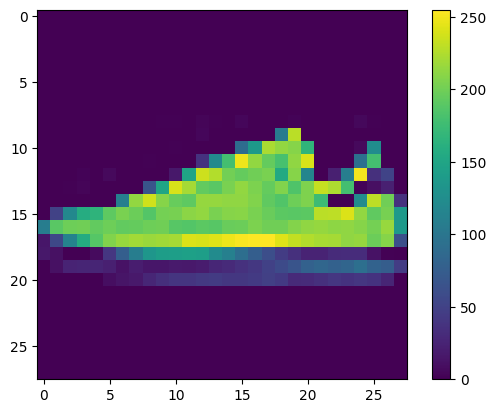

In [8]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#Data Preprocessing

train_images = train_images / 255.0

test_images = test_images / 255.0

In [10]:
#Building the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [11]:
#Compiling the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#Training the model

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4977 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3741 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3371 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3112 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2934 - accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2815 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2683 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2574 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2486 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.23

In [13]:
#evaluating the model

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Test Accuracy: ', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3277 - accuracy: 0.8839
Test Accuracy:  0.883899986743927


In [15]:
predictions = model.predict(test_images)
print(predictions[0])

313/313 [==============================] - 1s 4ms/step
[1.7962252e-08 3.0520149e-09 7.1889404e-11 1.5171769e-07 1.8096588e-10
 1.4799568e-05 3.3020046e-07 6.8898890e-03 1.8134037e-07 9.9309450e-01]


In [16]:
print(np.argmax(predictions[0]))

9


Trouser


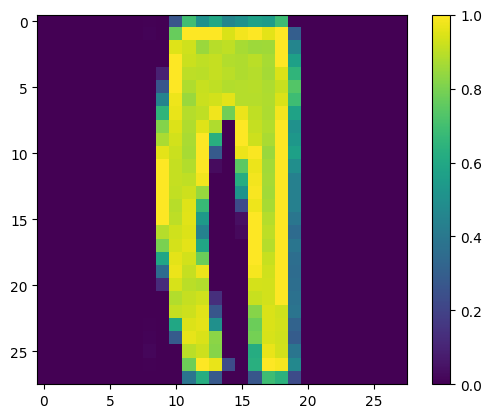

In [26]:
print(class_names[np.argmax(predictions[2])])
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

### Deep Computer Vision


*   Image Data
*   Convolutional Layer
*   Pooling Layer
*   CNN Architecture

#### Image Data

*   Image Height
*   Image Width
*   Color Channels - depth of an image and correlates to the colors used in it.
3 channels - RGB

#### CNN



1.   Input size
2.   Number of filters
3.   Sample size of the filters



*   Padding
*   Stride
*   Pooling - min, max and avg

#### Creating a Convnet - CIFAR dataset

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

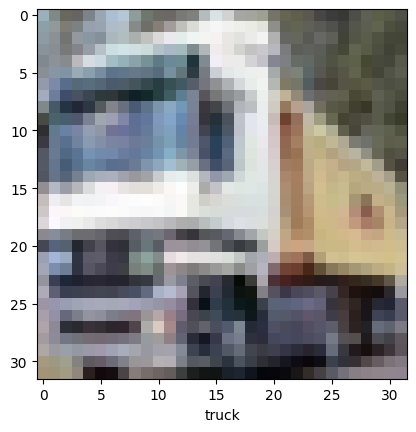

In [4]:
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[1][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Now to classify these extracted features

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Training the model

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs = 4, validation_data = (test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 90s 54ms/step - loss: 1.5306 - accuracy: 0.4379 - val_loss: 1.2618 - val_accuracy: 0.5450
Epoch 2/4
1364/1563 [=========================>....] - ETA: 9s - loss: 1.1720 - accuracy: 0.5837

KeyboardInterrupt: ignored

Evaluating the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

*   Data Augmentation
*   Pretrained Models (basemode.trainable = False)
*   Fine Tuning

base_learning_rate --> How much is it allowed to modify the weights and biases

Format for saving model in keras -> .h5